# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house


## Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [256]:
USAhousing = pd.read_csv('data/USA_Housing.csv')

In [257]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [258]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [259]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [260]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

Let's create some simple plots to check out the data!

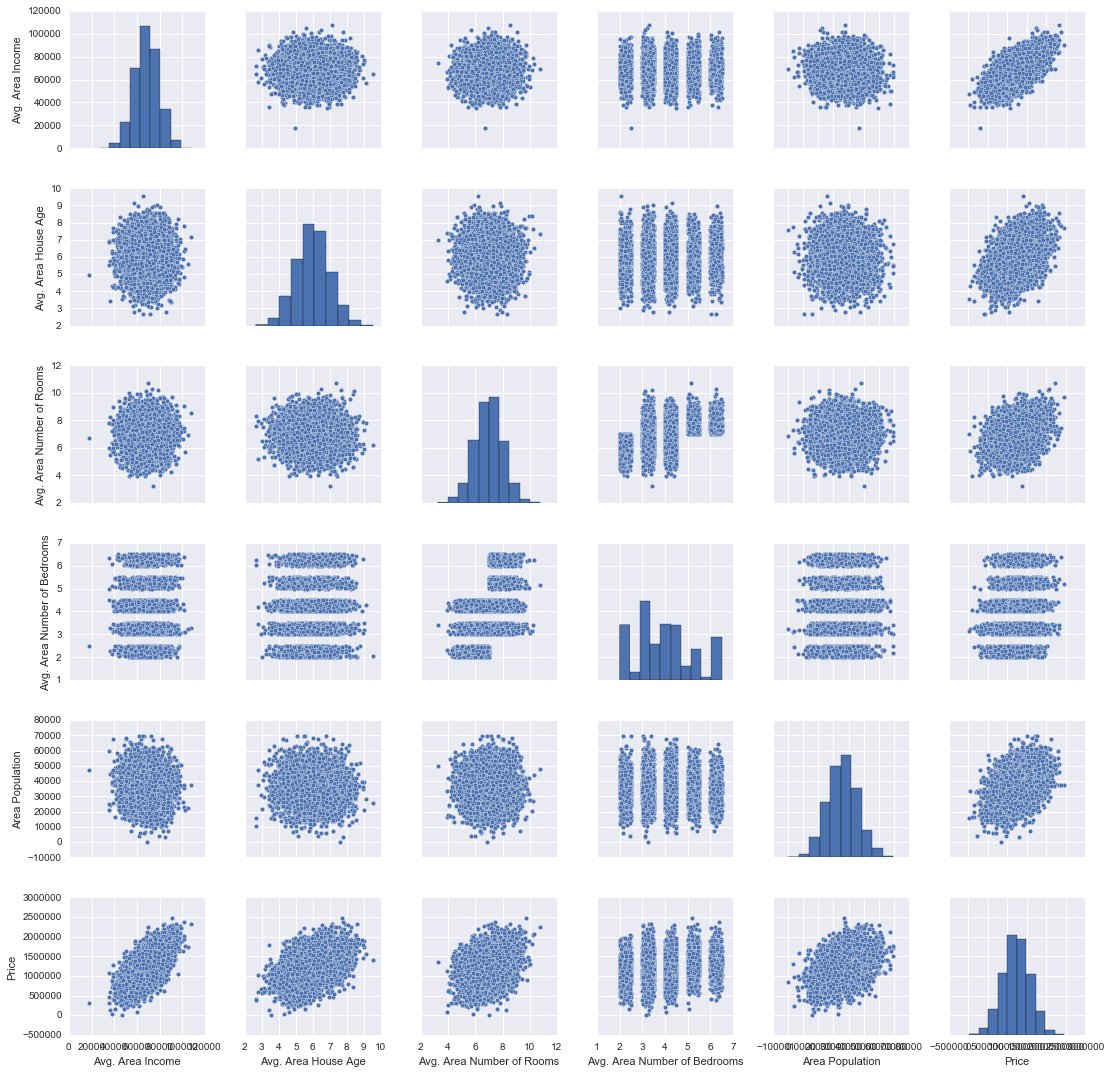

In [261]:
sns.pairplot(USAhousing)

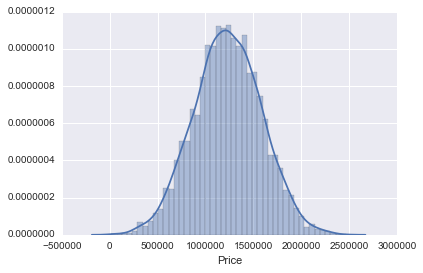

In [262]:
sns.distplot(USAhousing['Price'])

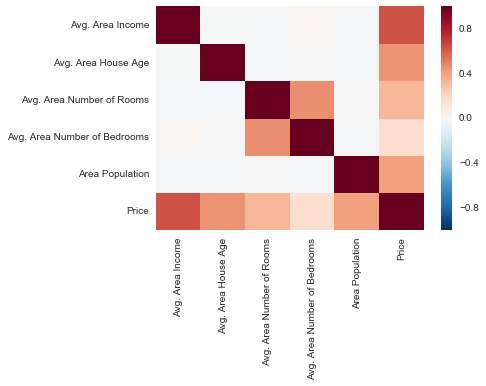

In [263]:
sns.heatmap(USAhousing.corr())

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [264]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
lm = LinearRegression()

In [269]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [270]:
# print the intercept
print(lm.intercept_)

-2640159.79685


In [277]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [279]:
predictions = lm.predict(X_test)

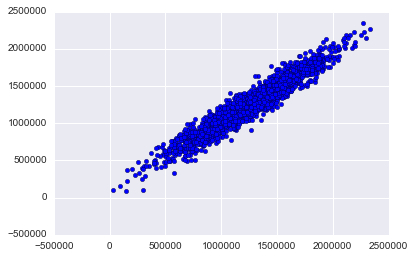

In [282]:
plt.scatter(y_test,predictions)

**Residual Histogram**

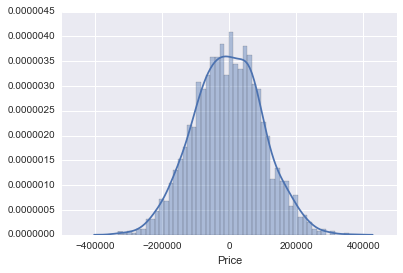

In [281]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [275]:
from sklearn import metrics

In [276]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.2225191
MSE: 10460958907.2
RMSE: 102278.829223


This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 

Up next is your own Machine Learning Project!

# Linear Regression Project - Casestudy

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [276]:
customers = pd.read_csv("data/Ecommerce Customers")

**Check the head of customers, and check out its info() and describe() methods.**

In [277]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [278]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [279]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [280]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

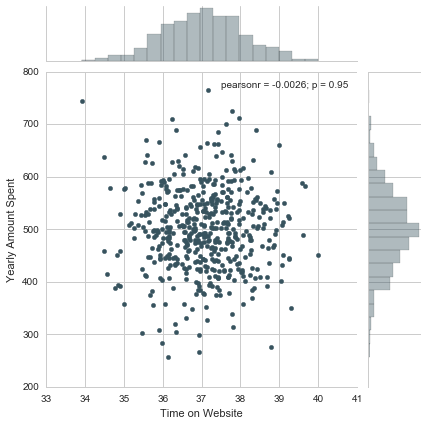

In [281]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

** Do the same but with the Time on App column instead. **

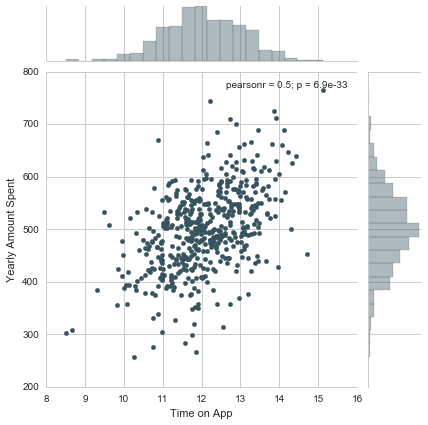

In [282]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

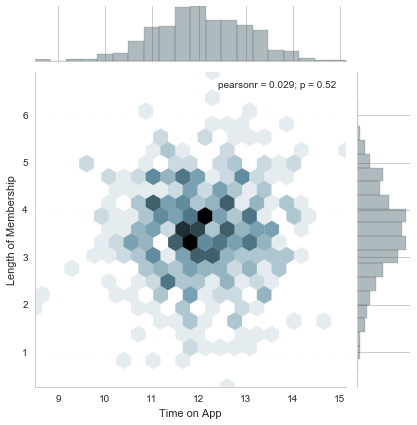

In [283]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

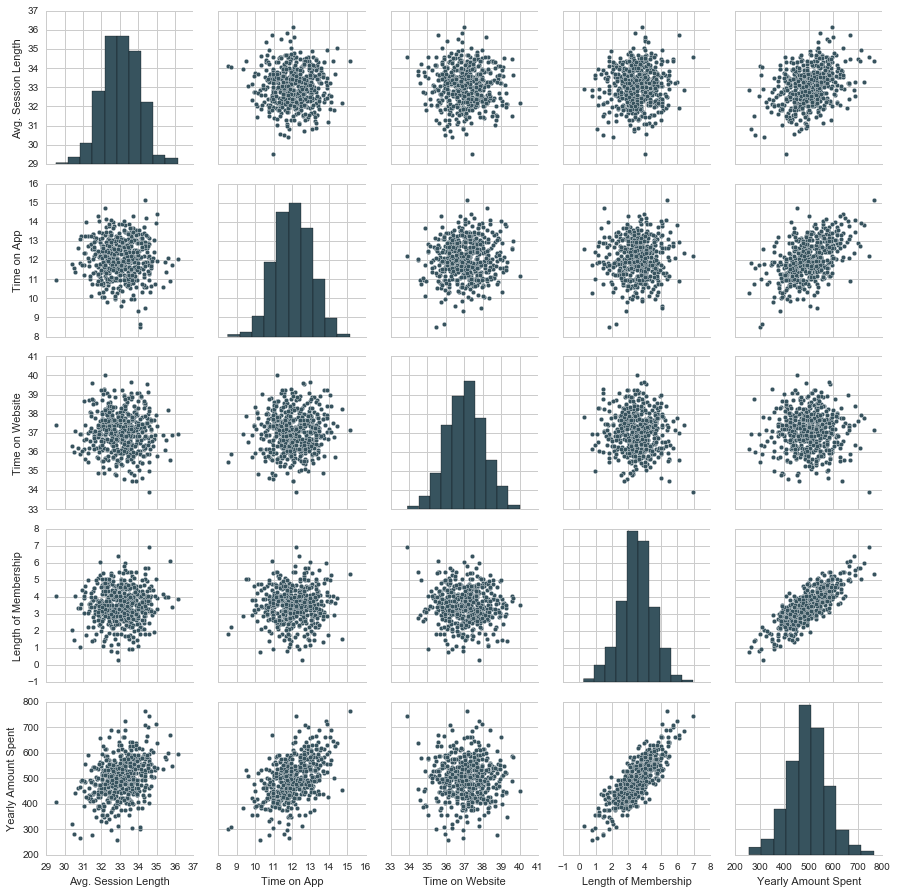

In [284]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [285]:
# Length of Membership 

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

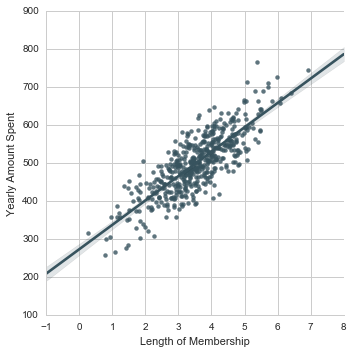

In [286]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [287]:
y = customers['Yearly Amount Spent']

In [288]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [291]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [292]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [293]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [294]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 25.98154972  38.59015875   0.19040528  61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [295]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

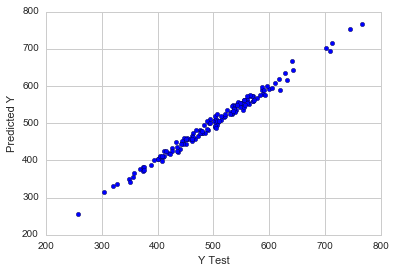

In [296]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [303]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

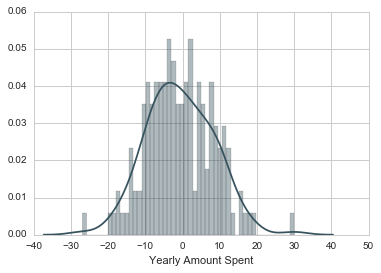

In [317]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [298]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
